Online shopping decisions rely on how consumers engage with online store content. You work for a new startup company that has just launched a new online shopping website. The marketing team asks you, a new data scientist, to review a dataset of online shoppers' purchasing intentions gathered over the last year. Specifically, the team wants you to generate some insights into customer browsing behaviors in November and December, the busiest months for shoppers. You have decided to identify two groups of customers: those with a low purchase rate and returning customers. After identifying these groups, you want to determine the probability that any of these customers will make a purchase in a new marketing campaign to help gauge potential success for next year's sales.

### Data description:

You are given an `online_shopping_session_data.csv` that contains several columns about each shopping session. Each shopping session corresponded to a single user. 

|Column|Description|
|--------|-----------|
|`SessionID`|unique session ID|
|`Administrative`|number of pages visited related to the customer account|
|`Administrative_Duration`|total amount of time spent (in seconds) on administrative pages|
|`Informational`|number of pages visited related to the website and the company|
|`Informational_Duration`|total amount of time spent (in seconds) on informational pages|
|`ProductRelated`|number of pages visited related to available products|
|`ProductRelated_Duration`|total amount of time spent (in seconds) on product-related pages|
|`BounceRates`|average bounce rate of pages visited by the customer|
|`ExitRates`|average exit rate of pages visited by the customer|
|`PageValues`|average page value of pages visited by the customer|
|`SpecialDay`|closeness of the site visiting time to a specific special day|
|`Weekend`|indicator whether the session is on a weekend|
|`Month`|month of the session date|
|`CustomerType`|customer type|
|`Purchase`|class label whether the customer make a purchase|

&nbsp;

&nbsp;

***
The marketing team asked you to analyze the behavior of online customers during November and December, the busiest months for shoppers.

What are the purchase rates for online shopping sessions by customer type for November and December? Store the result in a dictionary called purchase_rates in the format below using the exact names for keys.
purchase_rates = {"Returning_Customer": 0.254, "New_Customer": 0.276}

What is the strongest correlation in total time spent among page types by returning customers in November and December? Store the result in a dictionary called top_correlation in the format below using the exact names for keys.
top_correlation = {"pair": (x_duration, y_duration), "correlation": 0.345}

A new campaign for the returning customers will boost the purchase rate by 15%. What is the likelihood of achieving at least 100 sales out of 500 online shopping sessions for the returning customers? Store the result in a variable called prob_at_least_100_sales. Optional: plot a binomial probability distribution chart to visualize your chances.

In [96]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Load and view your data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


{'Returning_Customer': 0.1955937667920473, 'New_Customer': 0.2733516483516483}
          A         I         P
A  1.000000  0.258108  0.416893
I  0.258108  1.000000  0.366551
P  0.416893  0.366551  1.000000
0.22493283181085436
0.9012221339037267


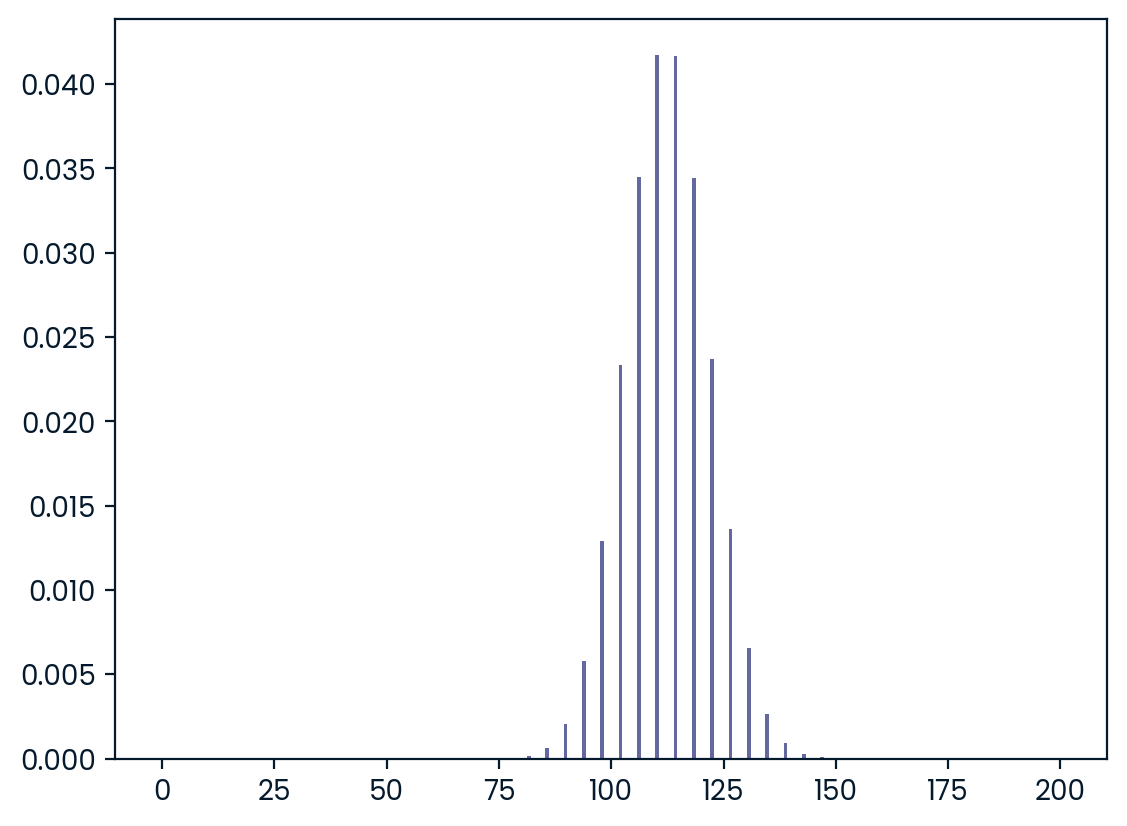

In [97]:
# Start your code here!
# Use as many cells as you like

# TODO - customer browsing behaviour in nov & dec 
# TODO - customer types - New_Customer & Returning_Customer 
# TODO - purchase rates by customer type - purchase_rates
# purchase_rates = {"Returning_Customer": 0.254, "New_Customer": 0.276}
pr = shopping_data.loc[shopping_data["Month"].isin(["Nov", "Dec"])]
pr = pr.groupby("CustomerType")["Purchase"].mean().reset_index()
pr.sort_values("CustomerType", ascending=False, inplace=True)
purchase_rates = pr.set_index("CustomerType")["Purchase"].to_dict()
print(purchase_rates)

# correlation, total time spent, page types, returning customer, nov & dec? - top_correlation
# top_correlation = {"pair": (x_duration, y_duration), "correlation": 0.345}
corr_ss = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration", "Month", "CustomerType"]
corr = shopping_data[corr_ss]
corr = corr.loc[(corr["Month"].isin(["Nov", "Dec"])) & (corr["CustomerType"] == "Returning_Customer")]
corr = corr[["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]]
corr.rename(columns={"Administrative_Duration":"A", "Informational_Duration":"I", "ProductRelated_Duration":"P"}, inplace=True)
print(corr.corr())
# sns.pairplot(corr, kind="reg")
# sns.heatmap(corr)
# plt.show()
top_correlation = {"pair": ("Administrative_Duration", "ProductRelated_Duration"), "correlation": 0.417}

# campaign for returning boost purchase rate 15%
# probability for 100 sales out of 500 sessions - prob_at_least_100_sales
# print(shopping_data["Purchase"])
new_pr = purchase_rates["Returning_Customer"] * 1.15
print(new_pr)
prob_at_least_100_sales = 1 - stats.binom.cdf(100, 500, new_pr)
print(prob_at_least_100_sales)

plt.bar(np.linspace(0,200), [stats.binom.pmf(r, 500, new_pr) for r in np.linspace(0,200)])
plt.show()